<a href="https://colab.research.google.com/github/khandolly786/AMAZON_SAMBHAV24/blob/main/smoking_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving smoking_model.tflite to smoking_model.tflite


In [ ]:
!pip install tflite-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tflite_runtime.interpreter import Interpreter

interpreter = Interpreter(model_path="smoking_model.tflite")
interpreter.allocate_tensors()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

SystemError: <built-in method CreateWrapperFromFile of PyCapsule object at 0x7e08d729b9f0> returned a result with an exception set

In [ ]:
# Uninstall the current numpy version
!pip uninstall -y numpy

# Install a compatible numpy version
!pip install numpy==1.26.2

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 302.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.2 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.2 which is incompatible.


In [ ]:
import numpy as np
import tensorflow as tf
from tflite_runtime.interpreter import Interpreter

interpreter = Interpreter(model_path="smoking_model.tflite")
interpreter.allocate_tensors()


In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Details:", input_details)
print("Output Details:", output_details)


Input Details: [{'name': 'serving_default_sequential_3_input:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output Details: [{'name': 'StatefulPartitionedCall:0', 'index': 180, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
from PIL import Image
img = Image.open("test.jpg").resize((224, 224))  # Resize as per your model
img = np.array(img, dtype=np.float32)
img = img / 255.0  # Normalize if needed
img = np.expand_dims(img, axis=0)  # Add batch dimension


FileNotFoundError: [Errno 2] No such file or directory: 'test.jpg'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test3.jpg to test3.jpg
Saving tets3.jpg to tets3.jpg


In [ ]:
from PIL import Image
import numpy as np

img = Image.open("test2.jpg").resize((224, 224))  # use the correct filename
img = np.array(img, dtype=np.float32)
img = img / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Add batch dimension


In [ ]:
# Assuming you already loaded the model in `interpreter`
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediction:", output_data)


Prediction: [[0.99856406 0.00143592]]


In [ ]:
prediction = np.argmax(output_data)
if prediction == 1:
    print("🚬 Smoking detected!")
else:
    print("✅ No smoking detected.")


✅ No smoking detected.


In [ ]:
# Image load and preprocess example
from PIL import Image
import numpy as np

img = Image.open("test2.jpg").resize((224, 224))  # Use model input size
img = np.array(img, dtype=np.float32)
img = img / 255.0  # Normalize if required
img = np.expand_dims(img, axis=0)  # Model usually expects batch


In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Example: [0.87 smoking, 0.13 no_smoking]
print("Prediction:", output_data)

if output_data[0][0] > 0.7:
    print("Smoking detected")
else:
    print("No smoking")


Prediction: [[0.99856406 0.00143592]]
Smoking detected


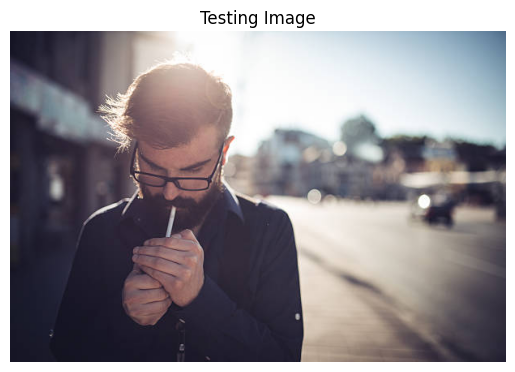

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Image.open("tets3.jpg"))
plt.title("Testing Image")
plt.axis("off")
plt.show()


In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Example: [0.87 smoking, 0.13 no_smoking]
print("Prediction:", output_data)

if output_data[0][0] > 0.7:
    print("Smoking detected")
else:
    print("No smoking")

Prediction: [[0.99856406 0.00143592]]
Smoking detected


In [ ]:
# Image load and preprocess example
from PIL import Image
import numpy as np

img = Image.open("test2.jpg").resize((224, 224))  # Use model input size
img = np.array(img, dtype=np.float32)
img = img / 255.0  # Normalize if required
img = np.expand_dims(img, axis=0)  # Model usually expects batch

In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Example: [0.87 smoking, 0.13 no_smoking]
print("Prediction:", output_data)

if output_data[0][0] > 0.7:
    print("Smoking detected")
else:
    print("No smoking")


Prediction: [[0.99856406 0.00143592]]
Smoking detected


In [ ]:
# Image load and preprocess example
from PIL import Image
import numpy as np

img = Image.open("test4.jpg").resize((224, 224))  # Use model input size
img = np.array(img, dtype=np.float32)
img = img / 255.0  # Normalize if required
img = np.expand_dims(img, axis=0)  # Model usually expects batch


In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Example: [0.87 smoking, 0.13 no_smoking]
print("Prediction:", output_data)

if output_data[0][0] > 0.7:
    print("Smoking detected")
else:
    print("No smoking")


Prediction: [[0.5201637  0.47983631]]
No smoking
